In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
df_complete = pd.read_csv('C:/Users/tally/Desktop/Sports Analytics/IPL.csv')

In [4]:
df_complete.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
# print the column names of the dataframe in a list
print(df_complete.columns.tolist())

['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type', 'batting_team', 'bowling_team']


In [6]:
df_18 = df_complete[df_complete['id'] >981019]
df_18.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
136530,1082591,1,7,2,MC Henriques,S Dhawan,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136531,1082591,1,7,3,S Dhawan,MC Henriques,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136532,1082591,1,7,4,MC Henriques,S Dhawan,TM Head,6,0,6,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136533,1082591,1,7,5,MC Henriques,S Dhawan,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136534,1082591,1,7,6,S Dhawan,MC Henriques,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore


In [7]:
BallBowled_counts = df_18['bowler'].value_counts()
BallFaced_counts = df_18['batsman'].value_counts()

BallBowled_counts = pd.DataFrame(BallBowled_counts)

BallBowled_counts.reset_index( inplace=True)


BallFaced_counts = pd.DataFrame(BallFaced_counts)

BallFaced_counts.reset_index( inplace=True)

In [8]:
BallFaced_counts

,index,batsman
0,S Dhawan,1586
1,KL Rahul,1398
2,SS Iyer,1396
3,DA Warner,1380
4,V Kohli,1374
...,...,...
239,MM Patel,1
240,MR Marsh,1
241,Y Prithvi Raj,1
242,JL Denly,1


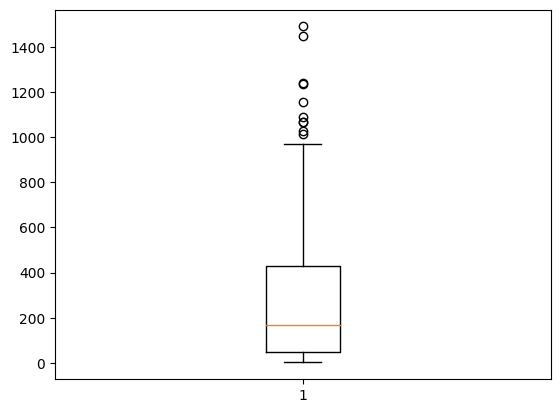

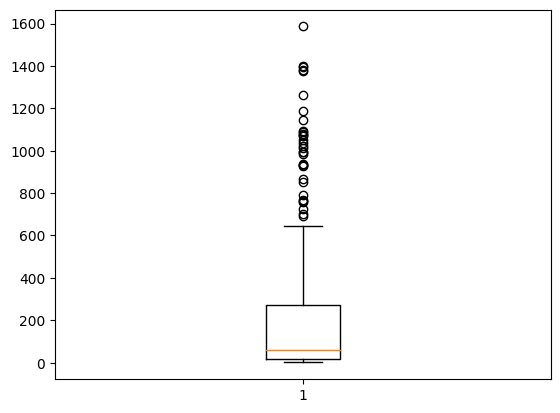

In [9]:
fig,ax =plt.subplots()

ax.boxplot(BallBowled_counts['bowler'])

plt.show()

fig,ax =plt.subplots()

ax.boxplot(BallFaced_counts['batsman'])

plt.show()

In [10]:
MedianBowl = BallBowled_counts['bowler'].median()

MedianBats = BallFaced_counts['batsman'].median()


In [11]:
MedianBowl

169.0

In [12]:
# Only select the bowlers and batsmen who have bowled and faced more than the median number of balls
# All rounders are players in both categories


Bowling_Targets = BallBowled_counts[BallBowled_counts['bowler']>MedianBowl]

Batting_Targets = BallFaced_counts[BallFaced_counts['batsman']>MedianBats]

# make the column name index in Bowling_Targets as the index 

Bowling_Targets.set_index('index', inplace=True)

# make the column name index in Batting_Targets as the index

Batting_Targets.set_index('index', inplace=True)


In [13]:
# output dataframe using inner join merging df_18 and Bowling_Targets

pd.merge(df_18, Bowling_Targets, left_on='bowler', right_on='index', how='inner')


,id,inning,over,ball,batsman,non_striker,bowler_x,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,bowler_y
0,1082591,1,8,1,S Dhawan,MC Henriques,YS Chahal,2,0,2,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,1240
1,1082591,1,8,6,MC Henriques,S Dhawan,YS Chahal,2,0,2,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,1240
2,1082591,1,8,2,S Dhawan,MC Henriques,YS Chahal,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,1240
3,1082591,1,8,3,MC Henriques,S Dhawan,YS Chahal,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,1240
4,1082591,1,8,4,S Dhawan,MC Henriques,YS Chahal,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,1240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50879,1216543,1,17,2,AT Carey,MP Stoinis,Kartik Tyagi,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Rajasthan Royals,241
50880,1216543,1,17,3,MP Stoinis,AT Carey,Kartik Tyagi,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Rajasthan Royals,241
50881,1216543,1,17,4,MP Stoinis,AT Carey,Kartik Tyagi,2,0,2,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Rajasthan Royals,241
50882,1216543,1,17,5,MP Stoinis,AT Carey,Kartik Tyagi,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Rajasthan Royals,241


In [14]:
# for all unique bowlers in df_18 count the instances where total runs is 0
# add column names dot_count to the Bowling_Targets dataframe

DotRatio = df_18[df_18['total_runs']==0]['bowler'].value_counts()

# convert DotRatio to dataframe
DotRatio = pd.DataFrame(DotRatio)

# rename the column name bowler to dot_count
DotRatio.rename(columns={'bowler':'dot_count'}, inplace=True)

# repeat the process for 1s, 2s, 3s, 4s, 6s
# rename the column name bowler to 1_count, 2_count, 3_count, 4_count, 6_count



DotRatio1 = df_18[df_18['total_runs']==1]['bowler'].value_counts()
DotRatio1 = pd.DataFrame(DotRatio1)
DotRatio1.rename(columns={'bowler':'1_count'}, inplace=True)

DotRatio2 = df_18[df_18['total_runs']==2]['bowler'].value_counts()
DotRatio2 = pd.DataFrame(DotRatio2)
DotRatio2.rename(columns={'bowler':'2_count'}, inplace=True)

DotRatio3 = df_18[df_18['total_runs']==3]['bowler'].value_counts()
DotRatio3 = pd.DataFrame(DotRatio3)
DotRatio3.rename(columns={'bowler':'3_count'}, inplace=True)

DotRatio4 = df_18[df_18['total_runs']==4]['bowler'].value_counts()
DotRatio4 = pd.DataFrame(DotRatio4)
DotRatio4.rename(columns={'bowler':'4_count'}, inplace=True)

DotRatio5 = df_18[df_18['total_runs']==5]['bowler'].value_counts()
DotRatio5 = pd.DataFrame(DotRatio5)
DotRatio5.rename(columns={'bowler':'5_count'}, inplace=True)

DotRatio6 = df_18[df_18['total_runs']==6]['bowler'].value_counts()
DotRatio6 = pd.DataFrame(DotRatio6)
DotRatio6.rename(columns={'bowler':'6_count'}, inplace=True)
# make another dataframe for wickets using is wicket column

DotRatioWicket = df_18[df_18['is_wicket']==1]['bowler'].value_counts()
DotRatioWicket = pd.DataFrame(DotRatioWicket)
DotRatioWicket.rename(columns={'bowler':'wicket_count'}, inplace=True)


DotRatio

,dot_count
Rashid Khan,605
JJ Bumrah,571
B Kumar,440
YS Chahal,437
Sandeep Sharma,428
...,...
Yuvraj Singh,2
MK Lomror,2
P Ray Barman,2
Mandeep Singh,1


In [15]:
# rename bowler column in Bowling_Targets to total balls bowled
Bowling_Targets.rename(columns={'bowler':'total_balls_bowled'}, inplace=True)

# rename bowler column in DotRatio to dot_count
DotRatio.rename(columns={'bowler':'dot_count'}, inplace=True)

# merge Bowling_Targets and DotRatio,DotRatio1, DotRatio2, DotRatio3, DotRatio4, DotRatio5, DotRatio6, DotRatioWicket on index

Bowling_Targets = pd.merge(Bowling_Targets, DotRatio, left_index=True, right_index=True, how='inner')
Bowling_Targets = pd.merge(Bowling_Targets, DotRatio1, left_index=True, right_index=True, how='inner')
Bowling_Targets = pd.merge(Bowling_Targets, DotRatio2, left_index=True, right_index=True, how='inner')
Bowling_Targets = pd.merge(Bowling_Targets, DotRatio3, left_index=True, right_index=True, how='inner')
Bowling_Targets = pd.merge(Bowling_Targets, DotRatio4, left_index=True, right_index=True, how='inner')
Bowling_Targets = pd.merge(Bowling_Targets, DotRatio5, left_index=True, right_index=True, how='inner')
Bowling_Targets = pd.merge(Bowling_Targets, DotRatio6, left_index=True, right_index=True, how='inner')
Bowling_Targets = pd.merge(Bowling_Targets, DotRatioWicket, left_index=True, right_index=True, how='inner')



C:\Users\tally\AppData\Local\Temp\ipykernel_35360\272734320.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
# repeat the process for batting targets

Batting_Targets.rename(columns={'batsman':'total_balls_faced'}, inplace=True)

DotRatioBats = df_18[df_18['total_runs']==0]['batsman'].value_counts()
DotRatioBats = pd.DataFrame(DotRatioBats)
DotRatioBats.rename(columns={'batsman':'dot_count'}, inplace=True)

DotRatioBats1 = df_18[df_18['total_runs']==1]['batsman'].value_counts()
DotRatioBats1 = pd.DataFrame(DotRatioBats1)
DotRatioBats1.rename(columns={'batsman':'1_count'}, inplace=True)

DotRatioBats2 = df_18[df_18['total_runs']==2]['batsman'].value_counts()
DotRatioBats2 = pd.DataFrame(DotRatioBats2)
DotRatioBats2.rename(columns={'batsman':'2_count'}, inplace=True)

DotRatioBats3 = df_18[df_18['total_runs']==3]['batsman'].value_counts()
DotRatioBats3 = pd.DataFrame(DotRatioBats3)
DotRatioBats3.rename(columns={'batsman':'3_count'}, inplace=True)

DotRatioBats4 = df_18[df_18['total_runs']==4]['batsman'].value_counts()
DotRatioBats4 = pd.DataFrame(DotRatioBats4)
DotRatioBats4.rename(columns={'batsman':'4_count'}, inplace=True)

DotRatioBats5 = df_18[df_18['total_runs']==5]['batsman'].value_counts()
DotRatioBats5 = pd.DataFrame(DotRatioBats5)
DotRatioBats5.rename(columns={'batsman':'5_count'}, inplace=True)

DotRatioBats6 = df_18[df_18['total_runs']==6]['batsman'].value_counts()
DotRatioBats6 = pd.DataFrame(DotRatioBats6)
DotRatioBats6.rename(columns={'batsman':'6_count'}, inplace=True)

DotRatioBatsWicket = df_18[df_18['is_wicket']==1]['batsman'].value_counts()
DotRatioBatsWicket = pd.DataFrame(DotRatioBatsWicket)
DotRatioBatsWicket.rename(columns={'batsman':'wicket_count'}, inplace=True)

Batting_Targets = pd.merge(Batting_Targets, DotRatioBats, left_index=True, right_index=True, how='inner')
Batting_Targets = pd.merge(Batting_Targets, DotRatioBats1, left_index=True, right_index=True, how='inner')
Batting_Targets = pd.merge(Batting_Targets, DotRatioBats2, left_index=True, right_index=True, how='inner')
Batting_Targets = pd.merge(Batting_Targets, DotRatioBats3, left_index=True, right_index=True, how='inner')
Batting_Targets = pd.merge(Batting_Targets, DotRatioBats4, left_index=True, right_index=True, how='inner')
Batting_Targets = pd.merge(Batting_Targets, DotRatioBats5, left_index=True, right_index=True, how='inner')
Batting_Targets = pd.merge(Batting_Targets, DotRatioBats6, left_index=True, right_index=True, how='inner')
Batting_Targets = pd.merge(Batting_Targets, DotRatioBatsWicket, left_index=True, right_index=True, how='inner')




C:\Users\tally\AppData\Local\Temp\ipykernel_35360\1629071322.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
# add column to both batting and bowling targets called boundary_count which is the sum of 4s and 6s

Bowling_Targets['boundary_count'] = Bowling_Targets['4_count'] + Bowling_Targets['6_count']
Batting_Targets['boundary_count'] = Batting_Targets['4_count'] + Batting_Targets['6_count']

In [18]:
Bowling_Targets

,total_balls_bowled,dot_count,1_count,2_count,3_count,4_count,5_count,6_count,wicket_count,boundary_count
Rashid Khan,1490,605,646,69,4,109,1,56,80,165
JJ Bumrah,1448,571,563,111,10,146,4,43,89,189
YS Chahal,1240,437,553,82,3,90,3,72,66,162
SP Narine,1236,416,559,82,4,118,3,54,46,172
KH Pandya,1089,342,540,76,1,91,1,38,42,129
B Kumar,1065,440,372,79,4,127,1,42,57,169
RA Jadeja,1026,315,488,79,4,85,1,54,38,139
DL Chahar,1013,425,350,57,5,144,3,29,45,173
JD Unadkat,969,305,400,72,6,114,1,71,55,185
TA Boult,945,364,326,55,2,155,1,42,56,197


In [19]:
Batting_Targets

,total_balls_faced,dot_count,1_count,2_count,3_count,4_count,5_count,6_count,wicket_count,boundary_count
S Dhawan,1586,476,715,96,6,244,2,47,57,291
SS Iyer,1396,444,655,85,4,145,2,61,54,206
DA Warner,1380,410,575,147,9,174,4,60,36,234
RR Pant,1261,367,554,72,1,168,2,96,52,264
MK Pandey,1189,357,571,96,4,118,2,41,40,159
MS Dhoni,1074,352,478,85,5,77,1,74,34,151
KS Williamson,1067,304,494,85,6,124,1,53,34,177
AM Rahane,1051,353,465,72,3,132,1,25,49,157
AB de Villiers,1037,299,453,69,5,115,1,95,36,210
SR Watson,1023,422,365,38,1,125,3,69,47,194


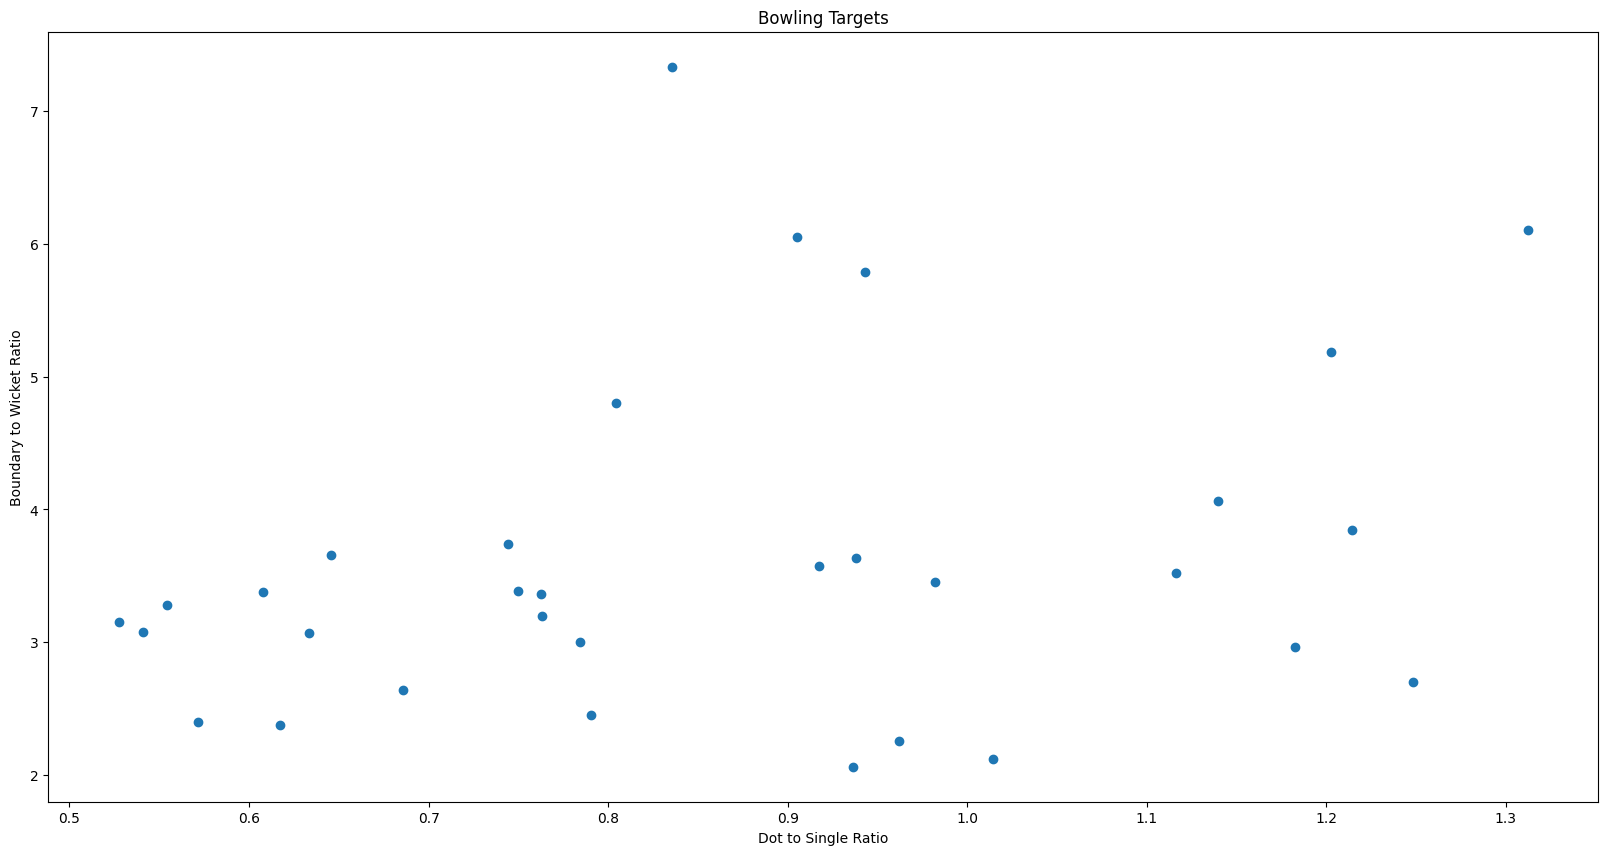

In [20]:
# build a plot which plots the ratio of dot_count to 1_count on the x axis and the ratio of boundary_count to wicket_count on the y axis
# add the name of the bowler as the label for each point

plt.figure(figsize=(20,10))
plt.scatter(Bowling_Targets['dot_count']/Bowling_Targets['1_count'], Bowling_Targets['boundary_count']/Bowling_Targets['wicket_count'])
plt.xlabel('Dot to Single Ratio')
plt.ylabel('Boundary to Wicket Ratio')
plt.title('Bowling Targets')
plt.show()




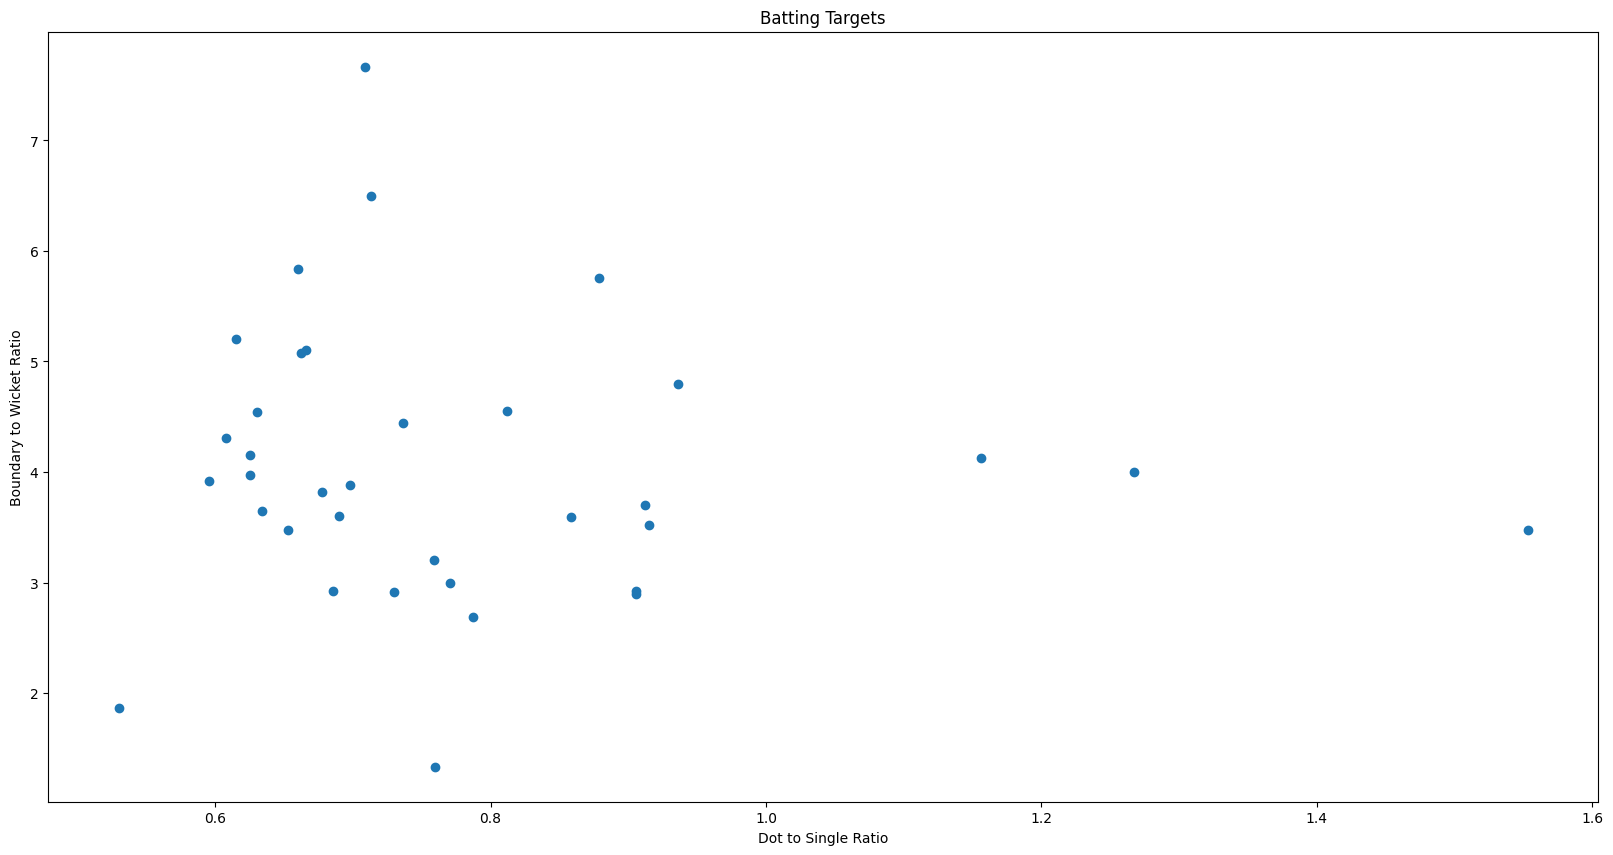

In [21]:
# build a plot which plots the ratio of dot_count to 1_count on the x axis and the ratio of boundary_count to wicket_count on the y axis for the Batting_Targets

plt.figure(figsize=(20,10))
plt.scatter(Batting_Targets['dot_count']/Batting_Targets['1_count'], Batting_Targets['boundary_count']/Batting_Targets['wicket_count'])
plt.xlabel('Dot to Single Ratio')
plt.ylabel('Boundary to Wicket Ratio')
plt.title('Batting Targets')
plt.show()


In [22]:
def run_by_overs(df):
  
  df1 = df[df['batsman_runs']==1]
  df2 = df[df['batsman_runs']==2]
  df3 = df[df['batsman_runs']==3]
  df4 = df[df['batsman_runs']==4]
  df5 = df[df['batsman_runs']==5]
  df6 = df[df['batsman_runs']==6]

  answer = []

  r1 = over_count(df1,1)
  answer.append([1,r1])
  r2 = over_count(df2,2)
  answer.append([2,r2])
  r3 = over_count(df3,3)
  answer.append([3,r3])
  r4 = over_count(df4,4)
  answer.append([4,r4])
  r5 = over_count(df5,5)
  answer.append([5,r5])
  r6 = over_count(df6,6)
  answer.append([6,r6])

  


  return answer

def over_count(df,run):

  counters = []
  pp    = len(df[df['over']<=6])*run
  mid = len(df[(df['over']>6) & (df['over']<=11)])*run
  drink = len(df[(df['over']>11) & (df['over']<=16)])*run
  end   = len(df[df['over']>=16])*run

  counters.append(pp)
  counters.append(mid)
  counters.append(drink)
  counters.append(end)


  return counters


def runs_by_segment(df):
    # initialize a dictionary to store the counts
    counts = {1: [0, 0, 0, 0], 2: [0, 0, 0, 0], 3: [0, 0, 0, 0], 4: [0, 0, 0, 0], 5: [0, 0, 0, 0], 6: [0, 0, 0, 0]}

    # loop through all the runs from 1 to 6
    for run in range(1, 7):
        # filter the DataFrame for the current run
        df_run = df[df['batsman_runs'] == run]
        
        # count the instances of the current run in the pp segment
        counts[run][0] = len(df_run[df_run['over'] <= 6])
        
        # count the instances of the current run in the mid segment
        counts[run][1] = len(df_run[(df_run['over'] > 6) & (df_run['over'] <= 11)])
        
        # count the instances of the current run in the drink segment
        counts[run][2] = len(df_run[(df_run['over'] > 11) & (df_run['over'] <= 16)])
        
        # count the instances of the current run in the end segment
        counts[run][3] = len(df_run[df_run['over'] >= 16])
    
    return counts

def runs_by_segment2(df):
    # initialize a dictionary to store the counts
    counts = {'pp': [0, 0, 0, 0, 0, 0], 'mid': [0, 0, 0, 0, 0, 0], 'drink': [0, 0, 0, 0, 0,0], 'end': [0, 0, 0, 0,0,0]}

    # loop through all the runs from 1 to 6
    for run in range(1, 7):
        # filter the DataFrame for the current run
        df_run = df[df['batsman_runs'] == run]
        
        # count the instances of the current run in the pp segment
        counts['pp'][run-1] = len(df_run[df_run['over'] <= 6])
        
        # count the instances of the current run in the mid segment
        counts['mid'][run-1] = len(df_run[(df_run['over'] > 6) & (df_run['over'] <= 11)])
        
        # count the instances of the current run in the drink segment
        counts['drink'][run-1] = len(df_run[(df_run['over'] > 11) & (df_run['over'] <= 16)])
        
        # count the instances of the current run in the end segment
        counts['end'][run-1] = len(df_run[df_run['over'] >= 16])
    
    return counts

def striker_segment_count(df):
    # create an empty dictionary to store the counts
    counts = {}

    # get a list of unique players
    players = df['batsman'].unique()
    
    # loop through the list of players
    for player in players:
        # filter the DataFrame for the current player
        df_player = df[df['batsman'] == player]
        
        # initialize an empty dictionary to store the counts for each segment
        segment_counts = {'pp': 0, 'mid': 0, 'drink': 0, 'end': 0}
        
        # count the instances of the player playing as striker in the Powerplay segment
        segment_counts['pp'] = len(df_player[(df_player['over'] <= 6)])
        
        # count the instances of the player playing as striker in the Mid segment
        segment_counts['mid'] = len(df_player[(df_player['over'] > 6) & (df_player['over'] <= 11)])
        
        # count the instances of the player playing as striker in the Drink segment
        segment_counts['drink'] = len(df_player[(df_player['over'] > 11) & (df_player['over'] <= 16)])
        
        # count the instances of the player playing as striker in the End segment
        segment_counts['end'] = len(df_player[df_player['over'] > 16])
        
        # add the player and their counts to the dictionary
        counts[player] = segment_counts
    
    return counts

def bowler_segment_count(df):
    # create an empty dictionary to store the counts
    counts = {}

    # get a list of unique players
    players = df['bowler'].unique()
    
    # loop through the list of players
    for player in players:
        # filter the DataFrame for the current player
        df_player = df[df['bowler'] == player]
        
        # initialize an empty dictionary to store the counts for each segment
        segment_counts = {'pp': 0, 'mid': 0, 'drink': 0, 'end': 0}
        
        # count the instances of the player playing as striker in the Powerplay segment
        segment_counts['pp'] = len(df_player[(df_player['over'] <= 6)])
        
        # count the instances of the player playing as striker in the Mid segment
        segment_counts['mid'] = len(df_player[(df_player['over'] > 6) & (df_player['over'] <= 11)])
        
        # count the instances of the player playing as striker in the Drink segment
        segment_counts['drink'] = len(df_player[(df_player['over'] > 11) & (df_player['over'] <= 16)])
        
        # count the instances of the player playing as striker in the End segment
        segment_counts['end'] = len(df_player[df_player['over'] > 16])
        
        # add the player and their counts to the dictionary
        counts[player] = segment_counts
    
    return counts



def NONstriker_segment_count(df):
    # create an empty dictionary to store the counts
    counts = {}

    # get a list of unique players
    players = df['non_striker'].unique()
    
    # loop through the list of players
    for player in players:
        # filter the DataFrame for the current player
        df_player = df[df['non_striker'] == player]
        
        # initialize an empty dictionary to store the counts for each segment
        segment_counts = {'pp': 0, 'mid': 0, 'drink': 0, 'end': 0}
        
        # count the instances of the player playing as striker in the Powerplay segment
        segment_counts['pp'] = len(df_player[(df_player['over'] <= 6)])
        
        # count the instances of the player playing as striker in the Mid segment
        segment_counts['mid'] = len(df_player[(df_player['over'] > 6) & (df_player['over'] <= 11)])
        
        # count the instances of the player playing as striker in the Drink segment
        segment_counts['drink'] = len(df_player[(df_player['over'] > 11) & (df_player['over'] <= 16)])
        
        # count the instances of the player playing as striker in the End segment
        segment_counts['end'] = len(df_player[df_player['over'] > 16])
        
        # add the player and their counts to the dictionary
        counts[player] = segment_counts
    
    return counts


In [23]:
def plot_runs_by_segment(df):
    counts = runs_by_segment2(df)
    labels = list(counts.keys())
    run1 = []
    run2 = []
    run3 = []
    run4 = []
    run5 = []
    run6 = []






    for segments in counts:
        run1.append(counts[segments][0])
        run2.append(counts[segments][1])
        run3.append(counts[segments][2])
        run4.append(counts[segments][3])
        run5.append(counts[segments][4])
        run6.append(counts[segments][5])
    
    run1Values = []
    run2Values = []
    run3Values = []
    run4Values = []
    run5Values = []
    run6Values = []


    for segments in counts:
        run1Values.append((counts[segments][0])*1)
        run2Values.append((counts[segments][1])*2)
        run3Values.append((counts[segments][2])*3)
        run4Values.append((counts[segments][3])*4)
        run5Values.append((counts[segments][4])*5)
        run6Values.append((counts[segments][5])*6)


    


        

    width = 0.35
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].bar(labels, run1, width,bottom= 1,  label='1')
    ax[0].bar(labels, run2, width,bottom = 2, label='2')
    ax[0].bar(labels, run3, width,bottom = 3,  label='3')
    ax[0].bar(labels, run4, width, bottom = 4,label='4')
    ax[0].bar(labels, run5, width, bottom = 5,label='5')
    ax[0].bar(labels, run6, width, bottom = 6,label='6')

    # show the size of the bar on the graph itself
    '''

    for i in range(len(run1)):
        ax[0].text(x = i-0.1 , y = run1[i]+0.5, s = run1[i], size = 10)
        ax[0].text(x = i-0.1 , y = run2[i]+1.5, s = run2[i], size = 10)
        ax[0].text(x = i-0.1 , y = run3[i]+2.5, s = run3[i], size = 10)
        ax[0].text(x = i-0.1 , y = run4[i]+3.5, s = run4[i], size = 10)
        ax[0].text(x = i-0.1 , y = run5[i]+4.5, s = run5[i], size = 10)
        ax[0].text(x = i-0.1 , y = run6[i]+5.5, s = run6[i], size = 10)
    
    '''

    





    ax[0].set_ylabel('Runs')
    ax[0].set_xlabel('Runs')
    ax[0].set_title('Runs(Instance/Count) by Over')
    ax[0].legend()

    ax[1].bar(labels, run1Values, width,bottom = run1Values,   label='1')
    ax[1].bar(labels, run2Values, width,bottom = run2Values, label='2')
    ax[1].bar(labels, run3Values, width,bottom = run3Values,  label='3')
    ax[1].bar(labels, run4Values, width, bottom = run4Values,label='4')
    ax[1].bar(labels, run5Values, width, bottom = run5Values,label='5')
    ax[1].bar(labels, run6Values, width, bottom = run6Values,label='6')

    # show the size of the bar on the graph itself
    '''
    for i in range(len(run1)):
        ax[1].text(x = i-0.1 , y = run1Values[i]+0.5, s = run1Values[i], size = 10)
        ax[1].text(x = i-0.1 , y = run2Values[i]+1.5, s = run2Values[i], size = 10)
        ax[1].text(x = i-0.1 , y = run3Values[i]+2.5, s = run3Values[i], size = 10)
        ax[1].text(x = i-0.1 , y = run4Values[i]+3.5, s = run4Values[i], size = 10)
        ax[1].text(x = i-0.1 , y = run5Values[i]+4.5, s = run5Values[i], size = 10)
        ax[1].text(x = i-0.1 , y = run6Values[i]+5.5, s = run6Values[i], size = 10)
    '''

    ax[1].set_ylabel('Runs')
    ax[1].set_xlabel('Runs')
    ax[1].set_title('Runs Value by Over')
    ax[1].legend()




    



    

    plt.show()




In [24]:
colors = ['turquoise', 'crimson']
def count_bowl(df,runs):
    return len(df[df['batsman_runs']==runs])*runs

# make a function which calcultes the runs based on the over number 

def runs_over(over):
    filt=(df_18['over']==over)
    df_over=df_18[filt]
    return df_over['total_runs'].sum()



def Bowler_Analysis(Bowler):
  filt=(df_18['bowler']==Bowler)
  df_bowl=df_18[filt]

  print("Dot Balls :",len(df_bowl[df_bowl['total_runs']==0]))
  print("Runs given from 1's :",count_bowl(df_bowl,1))
  print("Runs given from 2's :",count_bowl(df_bowl,2))
  print("Runs given from 3's :",count_bowl(df_bowl,3))
  print("Runs given from 4's :",count_bowl(df_bowl,4))
  print("Runs given from 6's :",count_bowl(df_bowl,6))
  print("Extras :",len(df_bowl[df_bowl['extra_runs']==1]))
  print("Wickets :",len(df_bowl[df_bowl['is_wicket']==1]))

  runs_total = df_bowl['total_runs'].sum()
  balls_total = len(df_bowl['batsman_runs'])
  
  print(" Runs Given per Ball :", round((runs_total/balls_total),2))

  # make plot neater and beautiful


  values = df_bowl['dismissal_kind'].value_counts()
  labels=df_bowl['dismissal_kind'].value_counts().index
  fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
  fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
  fig.update_layout(title="Wicket Type",
                  titlefont={'size': 30},
                  )
  fig.show()

  plot_runs_by_segment(df_bowl)

  play_count = bowler_segment_count(df_bowl)
  label2 = list(play_count.keys())
  pp = []
  mid = []
  drink = []
  end = []
  for player in play_count:
       pp.append(play_count[player]['pp'])
       mid.append(play_count[player]['mid'])
       drink.append(play_count[player]['drink'])
       end.append(play_count[player]['end'])
  
  width = 0.35
  fig, ax = plt.subplots(figsize=(10,5))
  ax.bar(label2, pp, width, label='Powerplay')
  ax.bar(label2, mid, width, label='Middle')
  ax.bar(label2, drink, width, label='Drinks')
  ax.bar(label2, end, width, label='End')
  
  ax.set_ylabel('Bowling Segment')
  ax.set_xlabel('Bowler')
  ax.set_title('Over Bowled in Segment by Bowler')
  ax.legend()

  #calculate the extra runs given by the bowler in each segment

  
  

In [25]:
# copy index to a new column called name in Bowling_Targets
Bowling_Targets['name'] = Bowling_Targets.index
widgets.interact(Bowler_Analysis, Bowler = Bowling_Targets['name'])



interactive(children=(Dropdown(description='Bowler', options=('Rashid Khan', 'JJ Bumrah', 'YS Chahal', 'SP Nar…

<function __main__.Bowler_Analysis(Bowler)>

In [26]:
def count_run(df,runs):
    return len(df[df['batsman_runs']==runs])*runs

def Batsman_Analysis(Batter):
  filt=(df_18['batsman']==Batter)
  df_bat=df_18[filt]

  print("Dot Ball's :",len(df_bat[df_bat['batsman_runs']==0]))
  print("Runs scored from 1's :",count_run(df_bat,1))
  print("Runs scored from 2's :",count_run(df_bat,2))
  print("Runs scored from 3's :",count_run(df_bat,3))
  print("Runs scored from 4's :",count_run(df_bat,4))
  print("Runs scored from 6's :",count_run(df_bat,6))

  runs_total = df_bat['total_runs'].sum()
  balls_total = len(df_bat['batsman_runs'])
  
  print(" Runs per Ball :", round((runs_total/balls_total),2))





  values = df_bat['dismissal_kind'].value_counts()
  labels=df_bat['dismissal_kind'].value_counts().index
  fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
  fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
  fig.update_layout(title="Dismissal Type",
                  titlefont={'size': 30},
                  )
  fig.show()

  plot_runs_by_segment(df_bat)

  play_count = striker_segment_count(df_bat)
  label2 = list(play_count.keys())
  pp = []
  mid = []
  drink = []
  end = []
  for player in play_count:
       pp.append(play_count[player]['pp'])
       mid.append(play_count[player]['mid'])
       drink.append(play_count[player]['drink'])
       end.append(play_count[player]['end'])
  
  width = 0.35
  fig, ax = plt.subplots(figsize=(10,5))
  ax.bar(label2, pp, width, label='Powerplay')
  ax.bar(label2, mid, width, label='Middle')
  ax.bar(label2, drink, width, label='Drinks')
  ax.bar(label2, end, width, label='End')

  ax.set_ylabel('Batting Segment')
  ax.set_xlabel('Batsman')
  ax.set_title('Batting Segment by Batsman')
  ax.legend()
  

In [27]:
Batting_Targets['name'] = Batting_Targets.index
widgets.interact(Batsman_Analysis, Batter = Batting_Targets['name'])

interactive(children=(Dropdown(description='Batter', options=('S Dhawan', 'SS Iyer', 'DA Warner', 'RR Pant', '…

<function __main__.Batsman_Analysis(Batter)>

In [28]:
def count_run(df,runs):
    return len(df[df['batsman_runs']==runs])*runs

def Non_Striker_Analysis(Batter):
  filt=(df_18['non_striker']==Batter)
  df_bat=df_18[filt]

  print("Dot Ball's :",len(df_bat[df_bat['batsman_runs']==0]))
  print("Runs scored from 1's :",count_run(df_bat,1))
  print("Runs scored from 2's :",count_run(df_bat,2))
  print("Runs scored from 3's :",count_run(df_bat,3))
  print("Runs scored from 4's :",count_run(df_bat,4))
  print("Runs scored from 6's :",count_run(df_bat,6))

  runs_total = df_bat['total_runs'].sum()
  balls_total = len(df_bat['batsman_runs'])
  
  print(" Runs per Ball :", round((runs_total/balls_total),2))





  values = df_bat['dismissal_kind'].value_counts()
  labels=df_bat['dismissal_kind'].value_counts().index
  fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
  fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
  fig.update_layout(title="Dismissal Type",
                  titlefont={'size': 30},
                  )
  fig.show()

  # use the plot_runs_by_segment function to plot the runs scored by the batsman in each over
  plot_runs_by_segment(df_bat)

  # use the striker_segment_count function to plot the runs scored by the batsman in each segment
  play_count = NONstriker_segment_count(df_bat)
  label2 = list(play_count.keys())
  pp = []
  mid = []
  drink = []
  end = []
  for player in play_count:
    pp.append(play_count[player]['pp'])
    mid.append(play_count[player]['mid'])
    drink.append(play_count[player]['drink'])
    end.append(play_count[player]['end'])

  width = 0.35
  fig, ax = plt.subplots(figsize=(10,5))
  ax.bar(label2, pp, width, label='Powerplay')
  ax.bar(label2, mid, width, label='Middle')
  ax.bar(label2, drink, width, label='Drinks')
  ax.bar(label2, end, width, label='End')

  ax.set_ylabel('Batting Segment')
  ax.set_xlabel('Non Striker')
  ax.set_title('Batting Segment by Non Striker')
  ax.legend()



  
  

In [29]:
Batting_Targets['name'] = Batting_Targets.index
widgets.interact(Non_Striker_Analysis, Batter = Batting_Targets['name'])

interactive(children=(Dropdown(description='Batter', options=('S Dhawan', 'SS Iyer', 'DA Warner', 'RR Pant', '…

<function __main__.Non_Striker_Analysis(Batter)>

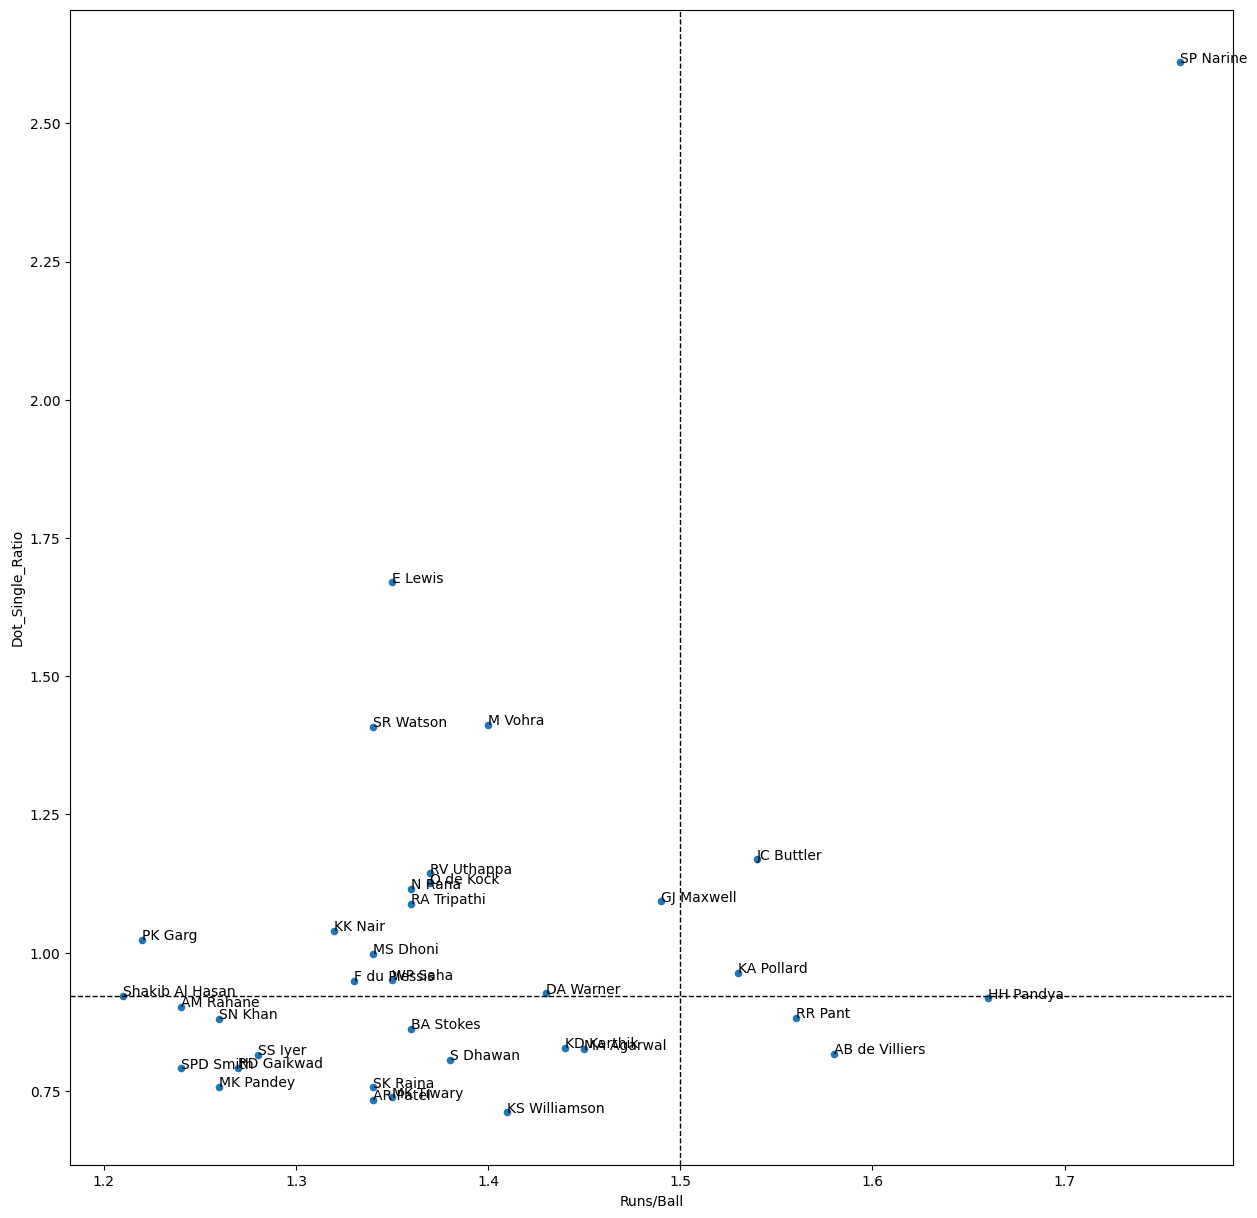

In [30]:
triall3 = []
for name in Batting_Targets['name']:
  x = df_18[df_18['batsman']==name]
  runs_total = x['total_runs'].sum()
  balls_total = len(x['batsman_runs'])
  runs_per_ball = round((runs_total/balls_total),2)
  wickets = len(x[x['is_wicket']==1])
  # get ratio of dot balls to singles
  dot_count = len(x[x['batsman_runs']==0])
  one_count = len(x[x['batsman_runs']==1])
  Dot_Single_Ratio = dot_count/one_count

  # get ratio of boundaries to wickets
  four_count = len(x[x['batsman_runs']==4])
  six_count = len(x[x['batsman_runs']==6])
  wicket_count = len(x[x['is_wicket']==1])
  Boundaries_Wickets_Ratio = (four_count+six_count)/wicket_count



  if runs_per_ball>=1.2:
    triall3.append([name,runs_per_ball,wickets, Dot_Single_Ratio, Boundaries_Wickets_Ratio])
triall4 = pd.DataFrame(triall3,columns= ['Name','Runs/Ball','Wickets','Dot_Single_Ratio','Boundaries_Wickets_Ratio'])

fig, ax = plt.subplots(figsize = (15,15))
triall4.plot('Runs/Ball', 'Dot_Single_Ratio', kind='scatter', ax=ax)

for i, txt in enumerate(triall4.Name):
    ax.annotate(txt, (triall4['Runs/Ball'].iat[i],triall4['Dot_Single_Ratio'].iat[i]))

ax.axhline(y=triall4['Dot_Single_Ratio'].median(), color='k', linestyle='--', linewidth=1)           
ax.axvline(x=1.5, color='k',linestyle='--', linewidth=1) 
 
plt.show()

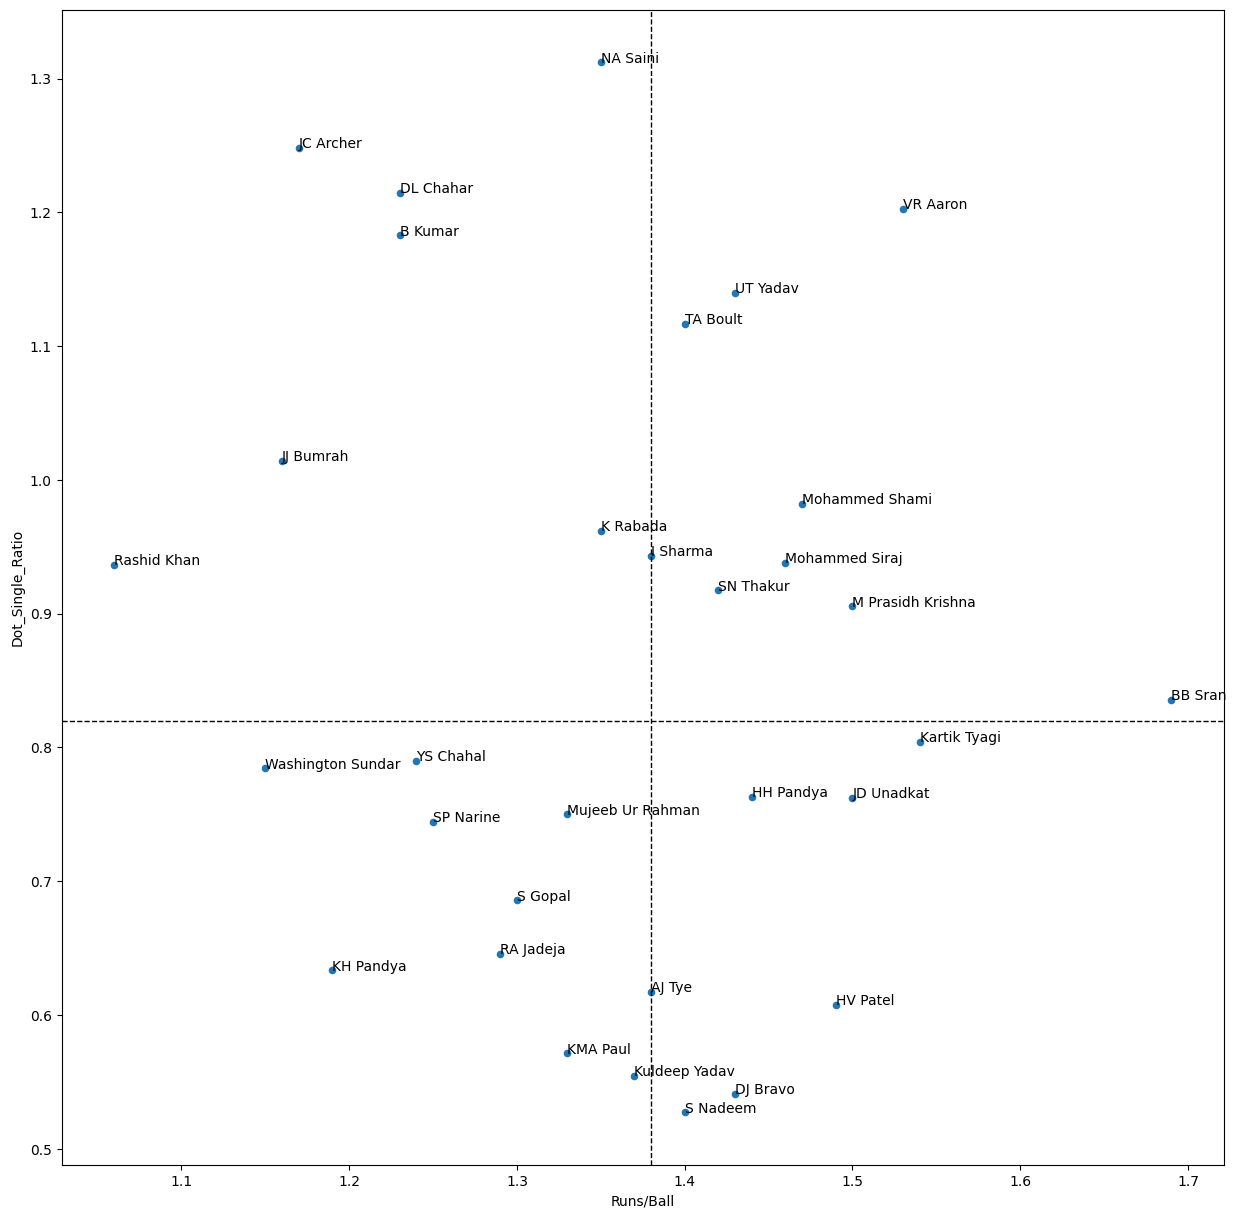

In [31]:
triall1 = []
for name in Bowling_Targets['name']:
  x = df_18[df_18['bowler']==name]
  runs_total = x['total_runs'].sum()
  balls_total = len(x['total_runs'])
  runs_per_ball = round((runs_total/balls_total),2)
  wickets = len(x[x['is_wicket']==1])
  triall1.append([name,runs_per_ball,wickets])
  # get ratio of dot balls to singles
  dot_count = len(x[x['total_runs']==0])
  one_count = len(x[x['total_runs']==1])
  Dot_Single_Ratio = dot_count/one_count

  # get ratio of boundaries to wickets
  four_count = len(x[x['total_runs']==4])
  six_count = len(x[x['total_runs']==6])
  wicket_count = len(x[x['is_wicket']==1])
  Boundaries_Wickets_Ratio = (four_count+six_count)/wicket_count





  if runs_per_ball>=0.5:
    triall1.append([name,runs_per_ball,wickets, Dot_Single_Ratio, Boundaries_Wickets_Ratio])
triall2 = pd.DataFrame(triall1,columns= ['Name','Runs/Ball','Wickets','Dot_Single_Ratio','Boundaries_Wickets_Ratio'])

fig, ax = plt.subplots(figsize = (15,15))
triall2.plot('Runs/Ball', 'Dot_Single_Ratio', kind='scatter', ax=ax)

for i, txt in enumerate(triall2.Name):
    ax.annotate(txt, (triall2['Runs/Ball'].iat[i],triall2['Dot_Single_Ratio'].iat[i]))

ax.axhline(y=triall2['Dot_Single_Ratio'].median(), color='k', linestyle='--', linewidth=1)           
ax.axvline(x=1.38, color='k',linestyle='--', linewidth=1) 
 
plt.show()

In [32]:
from ipywidgets import interact, Dropdown

def scatter_plot(x_col, y_col):
    fig, ax = plt.subplots(figsize = (15,15))
    # remove the name column from the dropdowns


    triall2.plot(x_col, y_col, kind='scatter', ax=ax)

    for i, txt in enumerate(triall2.Name):
        ax.annotate(txt, (triall2[x_col].iat[i],triall2[y_col].iat[i]))
    
    while x_col != 'Name' and y_col != 'Name':
        ax.axhline(y=triall2[y_col].median(), color='k', linestyle='--', linewidth=1)           
        ax.axvline(x=triall2[x_col].median(), color='k',linestyle='--', linewidth=1) 
    plt.show()

x_col_dropdown = Dropdown(options=triall2.columns, description='X-axis:')
y_col_dropdown = Dropdown(options=triall2.columns, description='Y-axis:')

interact(scatter_plot, x_col=x_col_dropdown, y_col=y_col_dropdown)


interactive(children=(Dropdown(description='X-axis:', options=('Name', 'Runs/Ball', 'Wickets', 'Dot_Single_Rat…

<function __main__.scatter_plot(x_col, y_col)>

In [33]:
'''
    filt=(df['batsman']==batsman)
    df_bat=df[filt]

    filt2=(df['bowler']==bowler)
    df_bowl=df[filt2]
    # also call runs_by_segment2 to get the runs scored in each segment for both batsman and bowler
    runs_by_segment_batsman = runs_by_segment2(df_bat)
    runs_by_segment_bowler = runs_by_segment2(df_bowl)
    batsman_runs_segment = []
    bowler_runs_segment = []
    for key, value in runs_by_segment_batsman.items():
        batsman_runs_segment.append([key,value])
    for key, value in runs_by_segment_bowler.items():
        bowler_runs_segment.append([key,value])

    extra1 = []
    extra2 = []
    for i in range(len(batsman_runs_segment)):
        extra1.append(batsman_runs_segment[i][1][0]*1 + batsman_runs_segment[i][1][1]*2 + batsman_runs_segment[i][1][2]*3 + batsman_runs_segment[i][1][3]*4 + batsman_runs_segment[i][1][4]*5 + batsman_runs_segment[i][1][5]*6)
    for i in range(len(bowler_runs_segment)):
        extra2.append(bowler_runs_segment[i][1][0]*1 + bowler_runs_segment[i][1][1]*2 + bowler_runs_segment[i][1][2]*3 + bowler_runs_segment[i][1][3]*4 + bowler_runs_segment[i][1][4]*5 + bowler_runs_segment[i][1][5]*6)

    # if any batsman_counts or bowler_counts are 0, replace with 1
    for i in range(len(batsman_counts)):
        if batsman_counts[i] == 0:
            batsman_counts[i] = 1
    for i in range(len(bowler_counts)):
        if bowler_counts[i] == 0:
            bowler_counts[i] = 1
            
'''



"\n    filt=(df['batsman']==batsman)\n    df_bat=df[filt]\n\n    filt2=(df['bowler']==bowler)\n    df_bowl=df[filt2]\n    # also call runs_by_segment2 to get the runs scored in each segment for both batsman and bowler\n    runs_by_segment_batsman = runs_by_segment2(df_bat)\n    runs_by_segment_bowler = runs_by_segment2(df_bowl)\n    batsman_runs_segment = []\n    bowler_runs_segment = []\n    for key, value in runs_by_segment_batsman.items():\n        batsman_runs_segment.append([key,value])\n    for key, value in runs_by_segment_bowler.items():\n        bowler_runs_segment.append([key,value])\n\n    extra1 = []\n    extra2 = []\n    for i in range(len(batsman_runs_segment)):\n        extra1.append(batsman_runs_segment[i][1][0]*1 + batsman_runs_segment[i][1][1]*2 + batsman_runs_segment[i][1][2]*3 + batsman_runs_segment[i][1][3]*4 + batsman_runs_segment[i][1][4]*5 + batsman_runs_segment[i][1][5]*6)\n    for i in range(len(bowler_runs_segment)):\n        extra2.append(bowler_runs_segment

In [34]:


def radar_matchup(df, batsman, bowler):
    # get the counts for the batsman and bowler in different segments
    batsman_counts = striker_segment_count(df)[batsman]
    bowler_counts = bowler_segment_count(df)[bowler]
    
    # create a radar chart
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_xticks(np.pi/180.0*np.linspace(0, 360, 4, endpoint=False))
    ax.set_xticklabels(['pp', 'mid', 'drink', 'end'])
    ax.plot(np.linspace(0, 2*np.pi, 4, endpoint=False), [batsman_counts[segment] for segment in ['pp', 'mid', 'drink', 'end']], 'o-', label=batsman)
    ax.plot(np.linspace(0, 2*np.pi, 4, endpoint=False), [bowler_counts[segment] for segment in ['pp', 'mid', 'drink', 'end']], 'o-', label=bowler)
    ax.legend()
    plt.show()


In [35]:
def select_players_radar(df):
    batsman_dropdown = widgets.Dropdown(options=list(Batting_Targets['name']), description='Batsman:')
    bowler_dropdown = widgets.Dropdown(options=list(Bowling_Targets['name']), description='Bowler:')
    output = widgets.Output()
    
    def on_batsman_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output:
                clear_output()
                radar_matchup(df, change['new'], bowler_dropdown.value)
                
    def on_bowler_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output:
                clear_output()
                radar_matchup(df, batsman_dropdown.value, change['new'])
                
    batsman_dropdown.observe(on_batsman_change)
    bowler_dropdown.observe(on_bowler_change)
    display(batsman_dropdown)
    display(bowler_dropdown)
    display(output)




In [36]:
from IPython.display import clear_output

widgets.interact(select_players_radar, df=widgets.fixed(df_18))

Output()

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.select_players_radar(df)>

In [37]:

# create a copy of Batting_Targets where the numeric columns are to be divided by 30 
# the new column names will be the old column names with '_per_30' appended

Batting_Targets2 = Batting_Targets.copy()
Batting_Targets2['total_balls_per_30'] = Batting_Targets2['total_balls_faced']/30
Batting_Targets2['dot_count_per_30'] = Batting_Targets2['dot_count']/30
Batting_Targets2['1_count_per_30'] = Batting_Targets2['1_count']/30
Batting_Targets2['2_count_per_30'] = Batting_Targets2['2_count']/30
Batting_Targets2['3_count_per_30'] = Batting_Targets2['3_count']/30
Batting_Targets2['4_count_per_30'] = Batting_Targets2['4_count']/30
Batting_Targets2['5_count_per_30'] = Batting_Targets2['5_count']/30
Batting_Targets2['6_count_per_30'] = Batting_Targets2['6_count']/30
Batting_Targets2['wicket_count_per_30'] = Batting_Targets2['wicket_count']/30
Batting_Targets2['boundary_count_per_30'] = Batting_Targets2['boundary_count']/30

#delete the old columns
Batting_Targets2.drop(['total_balls_faced', 'dot_count', '1_count', '2_count', '3_count', '4_count', '5_count', '6_count', 'wicket_count', 'boundary_count'], axis=1, inplace=True)

Batting_Targets2.head()






,name,total_balls_per_30,dot_count_per_30,1_count_per_30,2_count_per_30,3_count_per_30,4_count_per_30,5_count_per_30,6_count_per_30,wicket_count_per_30,boundary_count_per_30
S Dhawan,S Dhawan,52.866667,15.866667,23.833333,3.200000,0.200000,8.133333,0.066667,1.566667,1.900000,9.700000
SS Iyer,SS Iyer,46.533333,14.800000,21.833333,2.833333,0.133333,4.833333,0.066667,2.033333,1.800000,6.866667
DA Warner,DA Warner,46.000000,13.666667,19.166667,4.900000,0.300000,5.800000,0.133333,2.000000,1.200000,7.800000
RR Pant,RR Pant,42.033333,12.233333,18.466667,2.400000,0.033333,5.600000,0.066667,3.200000,1.733333,8.800000
MK Pandey,MK Pandey,39.633333,11.900000,19.033333,3.200000,0.133333,3.933333,0.066667,1.366667,1.333333,5.300000


In [38]:
# create a ranker function that will rank the players based on the selected column and give percentile scores

def ranker(df, column):
    df['rank'+column] = df[column].rank(ascending=False)
    df['percentile'+column] = round(df['rank'+column]/len(df),2)*100
    return df

# run the ranker function on the Batter_Targets2 dataframe for each numeric column
# the new column names will be the old column names with '_rank' appended

Batting_Targets3 = Batting_Targets2.copy()
Batting_Targets3 = ranker(Batting_Targets3, 'total_balls_per_30')
Batting_Targets3 = ranker(Batting_Targets3, 'dot_count_per_30')
Batting_Targets3 = ranker(Batting_Targets3, '1_count_per_30')
Batting_Targets3 = ranker(Batting_Targets3, '2_count_per_30')
Batting_Targets3 = ranker(Batting_Targets3, '3_count_per_30')
Batting_Targets3 = ranker(Batting_Targets3, '4_count_per_30')
Batting_Targets3 = ranker(Batting_Targets3, '5_count_per_30')
Batting_Targets3 = ranker(Batting_Targets3, '6_count_per_30')
Batting_Targets3 = ranker(Batting_Targets3, 'wicket_count_per_30')
Batting_Targets3 = ranker(Batting_Targets3, 'boundary_count_per_30')

Batting_Targets3.head()


,name,total_balls_per_30,dot_count_per_30,1_count_per_30,2_count_per_30,3_count_per_30,4_count_per_30,5_count_per_30,6_count_per_30,wicket_count_per_30,...,rank4_count_per_30,percentile4_count_per_30,rank5_count_per_30,percentile5_count_per_30,rank6_count_per_30,percentile6_count_per_30,rankwicket_count_per_30,percentilewicket_count_per_30,rankboundary_count_per_30,percentileboundary_count_per_30
S Dhawan,S Dhawan,52.866667,15.866667,23.833333,3.200000,0.200000,8.133333,0.066667,1.566667,1.900000,...,1.0,3.0,11.5,33.0,15.0,43.0,1.0,3.0,1.0,3.0
SS Iyer,SS Iyer,46.533333,14.800000,21.833333,2.833333,0.133333,4.833333,0.066667,2.033333,1.800000,...,5.0,14.0,11.5,33.0,9.0,26.0,2.0,6.0,6.0,17.0
DA Warner,DA Warner,46.000000,13.666667,19.166667,4.900000,0.300000,5.800000,0.133333,2.000000,1.200000,...,2.0,6.0,1.5,4.0,10.0,29.0,15.5,44.0,3.0,9.0
RR Pant,RR Pant,42.033333,12.233333,18.466667,2.400000,0.033333,5.600000,0.066667,3.200000,1.733333,...,3.0,9.0,11.5,33.0,1.0,3.0,3.0,9.0,2.0,6.0
MK Pandey,MK Pandey,39.633333,11.900000,19.033333,3.200000,0.133333,3.933333,0.066667,1.366667,1.333333,...,12.0,34.0,11.5,33.0,17.0,49.0,9.5,27.0,14.5,41.0


In [39]:
# make a funciton for horizontal bar charts
# y-axis is the column name
# x-axis is the value, of the numeric column, the percentile score, the bar chart will be colored based on the percentile score
# this chart will be for each player

import matplotlib.cm as cm

def bar_chart(df, column):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(df['name'], df[column], color=cm.viridis(df['percentile'+column]/100))
    ax.set_xlabel(column)
    ax.set_ylabel('Player')
    ax.set_title('Player Performance')
    plt.show()

# make a function that will create a dropdown menu for the names of the players
# the output will be the horizontal bar chart for the selected column

def select_players_bar(df):
    player_dropdown = widgets.Dropdown(options=list(Batting_Targets['name']), description='Player:')
    column_dropdown = widgets.Dropdown(options=list(Batting_Targets3.columns[2:]), description='Column:')
    output = widgets.Output()
    
    def on_player_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output:
                clear_output()
                bar_chart(df, column_dropdown.value)
                
    def on_column_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output:
                clear_output()
                bar_chart(df, change['new'])
                
    player_dropdown.observe(on_player_change)
    column_dropdown.observe(on_column_change)
    display(player_dropdown)
    display(column_dropdown)
    display(output)

widgets.interact(select_players_bar, df=widgets.fixed(Batting_Targets3))



Output()

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.select_players_bar(df)>

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import ipywidgets as widgets
from IPython.display import display

def bar_chart(df, player, column):
    player_data = df[df['name'] == player]
    value = player_data[column].values[0]
    percentile = player_data[column].values[0]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(player, value, color=cm.viridis(percentile/100))
    ax.set_xlabel(column)
    ax.set_ylabel('Player')
    ax.set_title('Player Performance')
    plt.show()

def select_players_bar(df):
    player_dropdown = widgets.Dropdown(options=list(df['name']), description='Player:')
    column_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='Column:')
    output = widgets.Output()
    
    def on_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output:
                clear_output()
                bar_chart(df, player_dropdown.value, column_dropdown.value)
    
    player_dropdown.observe(on_change)
    column_dropdown.observe(on_change)
    
    display(widgets.HBox([player_dropdown, column_dropdown]))
    display(output)
    
select_players_bar(Batting_Targets3)


Output()